# FIFA 2022
   Project by : P M Ranasinghe

### Analyzing the Available Data

In [11]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import random
from IPython.display import Image
random_num=122

In [12]:
#Reading the dataset

df=pd.read_csv("../input/international-football-results-from-1872-to-2017/results.csv")
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7.0,2.0,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9.0,0.0,Friendly,Glasgow,Scotland,False


In [13]:
df.describe()

,home_score,away_score
count,44059.000000,44059.000000
mean,1.740507,1.178306
std,1.747525,1.394815
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [14]:
#Preprocessing
#Finding outmissing values

df.isnull().sum()
#No any missing values
#We are good to go

date          0
home_team     0
away_team     0
home_score    1
away_score    1
tournament    0
city          0
country       0
neutral       0
dtype: int64

([<matplotlib.axis.XTick at 0x7f9bacb85e90>,
 [Text(1, 0, 'Home Score'), Text(2, 0, 'Away Score')])

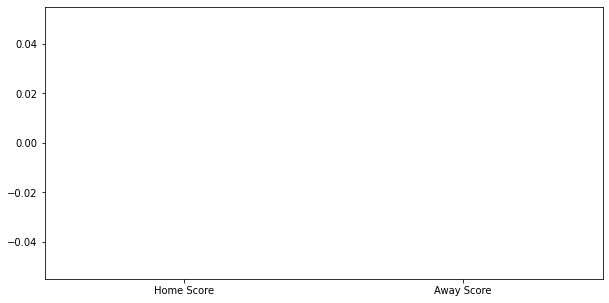

In [15]:
#finding outliers in the numerical data columns

fig = plt.figure(figsize =(10, 5))
plt.boxplot([df["home_score"],df["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

In [16]:
#Boxplot says there are many outliers
#Let's remove those outlier,It will make our Machine Learning model more accurate
#Asume maximum goals that one team can score is 15

higher_home=15
higher_away=15
df=df[(df["home_score"]<higher_home) & (df["away_score"]<higher_away)]
df.head(5)
#Dataset after removing outliers

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [17]:
#Making a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team

conditions  = [df["home_score"] ==df["away_score"], df["home_score"] > df["away_score"] , df["home_score"] < df["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df["Win_Statues"] = np.select(conditions, choices)
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Win


In [18]:
#See what are the Countries in the dataset

countries=df.home_team.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 309 Countries in the home_team Column

Countries-['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Paraguay' 'Japan' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis' 'Panama' 'Slovakia'
 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghan

**Type of the Matches**

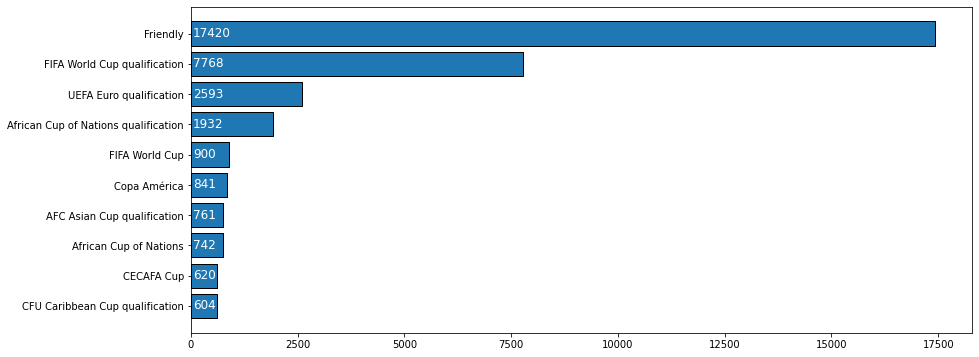

In [19]:
rank_bound = 10
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

**Teams played most Matches**

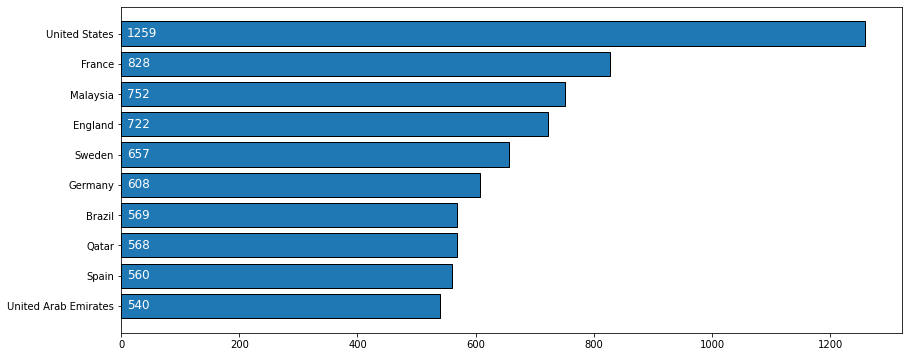

In [20]:
rank_bound = 10
ax = df.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

**Number of Matches played in equal intervals**

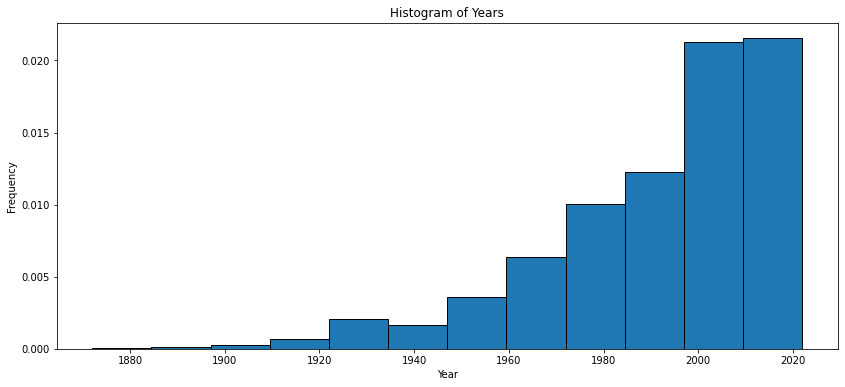

In [21]:
years = []
for date in df.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

#Most matches are played after 1960

### (1) Finding out the impact hosting a major tournament helps a country's chances in winning matches?

In [22]:
#Now take the rpws that home_team==Country 
#Nad romove the data of friendly matches

data_home=df.loc[df["home_team"]==df["country"] ]
data_home=df.loc[df["tournament"] != "Friendly"]
data_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
29,1884-01-26,Northern Ireland,Scotland,0.0,5.0,British Championship,Belfast,Ireland,False,Lost
30,1884-02-09,Wales,Northern Ireland,6.0,0.0,British Championship,Wrexham,Wales,False,Win
31,1884-02-23,Northern Ireland,England,1.0,8.0,British Championship,Belfast,Ireland,False,Lost
32,1884-03-15,Scotland,England,1.0,0.0,British Championship,Glasgow,Scotland,False,Win
33,1884-03-17,Wales,England,0.0,4.0,British Championship,Wrexham,Wales,False,Lost


**Home Team Winning Statistcs**

In [23]:
#How home team performs in tournament matches

tournament_df=pd.crosstab(data_home["tournament"], data_home["Win_Statues"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(10)
tournament_df.style.bar(color="brown",subset=["Draw","Lost","Win","All"])

Win_Statues,Draw,Lost,Win,All
tournament,,,,
All,5788,7575,13225,26588
FIFA World Cup qualification,1644,2137,3987,7768
UEFA Euro qualification,510,818,1265,2593
African Cup of Nations qualification,472,379,1081,1932
FIFA World Cup,199,290,411,900
Copa América,181,230,430,841
AFC Asian Cup qualification,126,188,447,761
African Cup of Nations,209,200,333,742
CECAFA Cup,147,185,288,620


Text(0.5, 1.0, 'Home Team Winning Status')

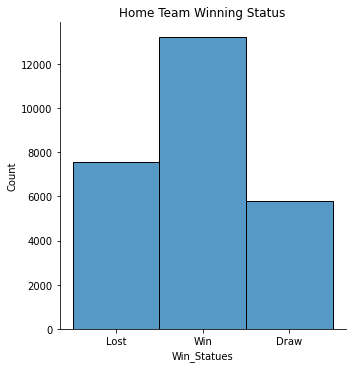

In [24]:
#Home team results
sns.displot(data_home, x="Win_Statues")
plt.title("Home Team Winning Status")

In [25]:
data_home['Win_Statues'].value_counts()

Win     13225
Lost     7575
Draw     5788
Name: Win_Statues, dtype: int64

In [26]:
#How each team perform while playing a tournament in home grounds

teams_win_statues=pd.crosstab(df["home_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>200]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability")

#We can see teams has more than 50% wining probability while playing in the home grounds 

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,110,58,423,591,0.715736
Spain,70,51,256,377,0.679045
Argentina,124,68,373,565,0.660177
Egypt,69,74,259,402,0.644279
Ivory Coast,67,35,182,284,0.640845
Nigeria,69,36,185,290,0.637931
Iran,63,43,184,290,0.634483
Italy,123,52,291,466,0.624464
Germany,112,86,327,525,0.622857


**Away team winning statistics**

In [27]:
#Teams playing in away conditions

teams_away_statues=pd.crosstab(df["away_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>200]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues_100.head(20)

#The probability to wining a tournament in away conditions is very low comapred to the winning probalities in home conditions

Win_Statues,Draw,Win,Win,Total,team_win_probability
away_team,,,,,
Brazil,95,228,102,425,0.536471
Germany,93,245,119,457,0.536105
England,136,270,117,523,0.516252
Spain,100,168,83,351,0.478632
Iran,67,102,57,226,0.451327
South Korea,114,181,109,404,0.448020
Netherlands,83,167,129,379,0.440633
Russia,116,176,113,405,0.434568
Japan,57,116,103,276,0.420290


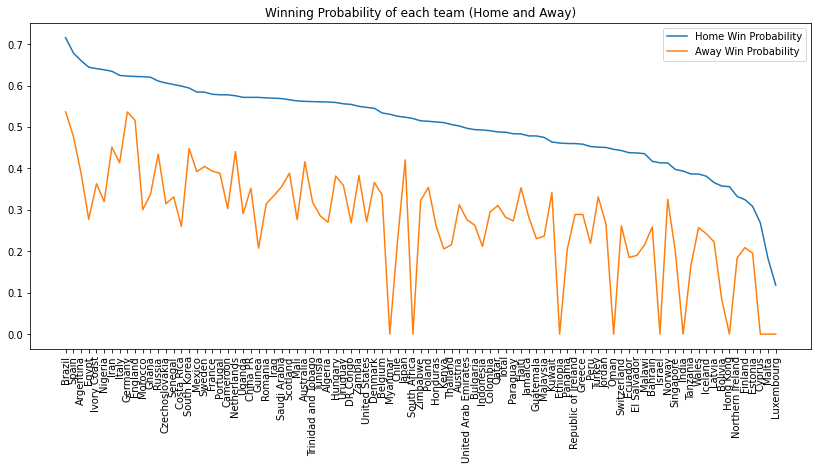

In [28]:
#Making a plot to identify wining possibilities in both home and away conditions

win_prob={teams_win_statues_100.iloc[i,:].name:[teams_win_statues_100.iloc[i,4]] for i in range(teams_win_statues_100.shape[0])}
for i in range(teams_away_statues_100.shape[0]):
    try:
        win_prob[teams_away_statues_100.iloc[i,:].name].append(teams_away_statues_100.iloc[i,4]) 
    except:
        pass
country_names=win_prob.keys()
lst_home=[i[0] for i in win_prob.values()]

lst_away=[]
for i in win_prob.values():
    if len(i)==2:
        lst_away.append(i[1])
    else:
        lst_away.append(0)

plt.figure(figsize=(14,6))
plt.plot(country_names,lst_home, label = "Home Win Probability")
plt.plot(country_names, lst_away, label = "Away Win Probability")
plt.xticks(rotation = 90)
plt.title("Winning Probability of each team (Home and Away)")
plt.legend()
plt.show()

Blue line is alway above the yellow line,showing home winning possibilies are always higher.

**Finally by analysing the data, we can identify that the home team has a clear edge while playing a tournament in their home grounds**



### (2) Finding Most Succesful Team

**Finding the team which performs best in home conditions each year interval**

In [29]:
#Home Conditions
#Convert the data set into 10 terms and findsout who has done best at each term 

range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=df.iloc[start:end]
    best_teams=pd.crosstab(term["home_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
    ##Lets take teams which plays atleast 20 games
    best_teams["team_win_probability"]=best_teams["Win"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    if (best_teams.shape[0]>2):
        print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")

No Enough data to find the best team in the term: 1872-1887 

Best 2 team in the term: 1887-1902 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      2 |      3 |    20 |      25 |               0.8      |
| Scotland    |      2 |      3 |    18 |      23 |               0.782609 |

Best 2 team in the term: 1902-1917 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Hungary     |      7 |      5 |    19 |      31 |               0.612903 |
| Argentina   |      6 |      6 |    18 |      30 |               0.6      |

Best 2 team in the term: 1917-1932 
| home_team      |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:---------------|-------:|-------:|------:|--------:|-----------------------:|
| Czechoslovakia |      8 |      1 |    21 |      30

ValueError: No objects to concatenate

**Finding the team which performs best in away conditions each year interval**

In [ ]:
#Away Conditions
##Convert the data set into 10 terms and findsout who has done best at each term 

range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=df.iloc[start:end]
    best_teams=pd.crosstab(term["away_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
    ##Lets take teams which plays atleast 200 games
    best_teams["team_win_probability"]=best_teams["Lost"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
    if (best_teams.shape[0]>2):
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")

### (3) FIFA World Cup -2022- QATAR

**Making a ML model**

In [30]:
df_match=df.copy() #making a copy of the main dataframe for future use
df_match.head(8)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Win
5,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,False,Win
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Lost
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Lost


In [31]:
#Making a new dataset with required features to train the machine learning model
#Year,Played Country,Team_1,team_2,team_1 score,team_2 score

New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,1],df_match.values[:,2],df_match.values[:,3],df_match.values[:,4])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
#Making a new dataset by changing the team_1 and team_2 and their respective scores
New_Dataset_part_2=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,2],df_match.values[:,1],df_match.values[:,4],df_match.values[:,3])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset =New_Dataset.sample(frac=1).reset_index(drop=True) #Shaffling the dataset
New_Dataset.head(5)

,year,Country,team_1,team_2,team_1_score,team_2_score
0,2010,Angola,Egypt,Nigeria,3.0,1.0
1,1974,Togo,Liberia,Togo,0.0,1.0
2,1969,Scotland,Scotland,Northern Ireland,1.0,1.0
3,2018,England,Cascadia,Barawa,2.0,1.0
4,2006,Ukraine,Ukraine,Azerbaijan,6.0,0.0


In [32]:
#Creating a list containg all the names of the countries

teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)

350

,year,team_1_score,team_2_score
year,1.000000,-0.126161,-0.126161
team_1_score,-0.126161,1.000000,-0.162164
team_2_score,-0.126161,-0.162164,1.000000


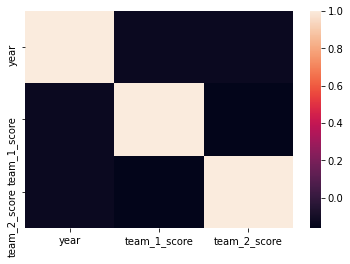

In [33]:
#Making a heatmap to see the correlation of each columns 

sns.heatmap(New_Dataset.corr())
New_Dataset.corr()

In [34]:
#Defining the features and labels(Targets)

Y= New_Dataset.iloc[:,4:6] #Training targets (team_1_score and team_2_score)
categorized_data=New_Dataset.iloc[:,0:4].copy() #Traing features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

#Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")


In [35]:
#Input Fatures to the model (x)

categorized_data.head(5)

,year,Country,team_1,team_2
0,2010,212,90,212
1,1974,305,167,305
2,1969,218,264,218
3,2018,24,56,24
4,2006,20,315,20


In [36]:
#Targets to the model (Y)

Y.head(5)

,team_1_score,team_2_score
0,3.0,1.0
1,0.0,1.0
2,1.0,1.0
3,2.0,1.0
4,6.0,0.0


In [37]:
#Info about the X and Y dataframes

print(categorized_data.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88016 entries, 0 to 88015
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     88016 non-null  int64   
 1   Country  88016 non-null  category
 2   team_1   88016 non-null  category
 3   team_2   88016 non-null  category
dtypes: category(3), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88016 entries, 0 to 88015
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   team_1_score  88016 non-null  float64
 1   team_2_score  88016 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB
None


In [40]:
X=categorized_data
print(X)
print(Y)

       year Country team_1 team_2
0      2010     212     90    212
1      1974     305    167    305
2      1969     218    264    218
3      2018      24     56     24
4      2006      20    315     20
...     ...     ...    ...    ...
88011  1981      29    244     29
88012  1986       4    291      4
88013  1996     288     76    288
88014  2009      98     85     98
88015  2000      93    103     93

[88016 rows x 4 columns]
       team_1_score  team_2_score
0               3.0           1.0
1               0.0           1.0
2               1.0           1.0
3               2.0           1.0
4               6.0           0.0
...             ...           ...
88011           0.0           1.0
88012           2.0           0.0
88013           4.0           0.0
88014           0.0           5.0
88015           0.0           0.0

[88016 rows x 2 columns]


In [125]:
df10= categorized_data
df10.head()

,year,Country,team_1,team_2,team_1_score,team_2_score
0,2010,212,90,212,3.0,1.0
1,1974,305,167,305,0.0,1.0
2,1969,218,264,218,1.0,1.0
3,2018,24,56,24,2.0,1.0
4,2006,20,315,20,6.0,0.0


In [131]:
df10["won"] = df10.apply(lambda row: 1 if row.team_1_score > row.team_2_score else 0, axis=1)
df10['score_diff']= df10.team_1_score- df10.team_2_score
df10.head()
games_train= df10.iloc[:66012, ]
games_test=  df10.iloc[66012:, ]

In [171]:
print(df10.head())
df10 = df10.astype('int64')
df10.dtypes

   year  Country  team_1  team_2  team_1_score  team_2_score  won  score_diff
0  2010      212      90     212             3             1    1           2
1  1974      305     167     305             0             1    0          -1
2  1969      218     264     218             1             1    0           0
3  2018       24      56      24             2             1    1           1
4  2006       20     315      20             6             0    1           6


year            int64
Country         int64
team_1          int64
team_2          int64
team_1_score    int64
team_2_score    int64
won             int64
score_diff      int64
dtype: object

In [182]:
df10.dtypes

year            int64
Country         int64
team_1          int64
team_2          int64
team_1_score    int64
team_2_score    int64
won             int64
score_diff      int64
dtype: object

In [183]:
# Import the model class
from tensorflow.keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [208]:
# Create an input layer with 3 columns
input_tensor = Input(shape=(2,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [206]:
games_train= games_train.astype('int64')
games_test= games_test.astype('int64')


In [209]:
# Fit the model
model.fit(games_train[['team_1', 'team_2']],
          games_train['score_diff'],
          epochs=2,
          verbose=True)

Epoch 1/2
2063/2063 [==============================] - 3s 2ms/step - loss: 88.3702
Epoch 2/2
2063/2063 [==============================] - 3s 1ms/step - loss: 1.7136


In [210]:
# Evaluate the model on the games_tourney_test dataset
print(model.evaluate(games_test[['team_1', 'team_2']],
               games_test['score_diff'], verbose=False))



1.6943917274475098


In [237]:
# Define the input
input_tensor = Input(shape=(2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [238]:
# Fit the model
model.fit(games_train[['team_1', 'team_2']],
  		  games_train[['team_1_score', 'team_2_score']],
  		  verbose=0,
  		  epochs=200,
  		  batch_size=16384)

In [239]:

# Print the model's weights
print(model.get_weights())

# Print the column means of the training data
print(games_train.mean())

# pred column messing up results
# each addition unit of seed equals points for team1

[array([[0.00141841, 0.00337181],
       [0.00146342, 0.00324887]], dtype=float32), array([ 0.50760096, -0.25943404], dtype=float32)]
year            1991.773344
Country          172.084197
team_1           172.295658
team_2           172.084197
team_1_score       1.453039
team_2_score       1.449418
won                0.385612
score_diff         0.003621
dtype: float64


In [240]:
# Evaluate the model on the tournament test data
print(model.evaluate(games_test[['team_1', 'team_2']], games_test[['team_1_score','team_2_score']], verbose=False))

1.1531143188476562


In [245]:
X_test= games_test[['team_1', 'team_2']]
y_test= games_test[['team_1_score', 'team_2_score']]

In [243]:
#Making the predictions

prd=model.predict(games_test[['team_1', 'team_2']])
prd

array([[1.1129218 , 1.1450293 ],
       [0.75539476, 0.3245566 ],
       [0.9292266 , 0.7120327 ],
       ...,
       [1.036865  , 0.93249804],
       [0.77158105, 0.34555924],
       [0.78979534, 0.3900075 ]], dtype=float32)

In [248]:
#Creating the Confusion matrix for each predictions

score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

from sklearn.metrics import mean_absolute_error
cm1=mean_absolute_error(list(y_test.iloc[:,0]),score_team_1)
cm2=mean_absolute_error(list(y_test.iloc[:,1]),score_team_2)
cm2

1.1937438652611465

In [250]:
#Fuction to Select the winning team for the prediction array

def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [252]:
#Sample Prediction

mactch_played=2015
team_1="Sri Lanka"
team_2="Brazil"
stadium="Qatar"

team_lst=[team_1,team_2]
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} -{team_1_num}")
print(f"Team 02 is {team_2} -{team_2_num}")
print(f"Played in  {stadium} -{stadium_num}")

Team 01 is Sri Lanka -286
Team 02 is Brazil -41
Played in  Qatar -242


In [255]:
#Sample Prediction Output

X_feature=np.array([[team_1_num,team_2_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_2} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽⚽\n") 

Sri Lanka vs Brazil 
 Sri Lanka wins 🏆⚽🎯



**FIFA WORLD CUP - 2022 -**

I have selected 32 teams that has the maximum posibility to participate in FIFA World Cup 2022.
These teams are selected accordingto the current world ranking and recently helg Euro Cup performances.

Every team plays with evey one-else(League System).That means one team plays 63 matches.Then from the model I predict who is going to win the match.
* Winning team gets 02 Point
* Match draw (Both teams scored same number of goals)- both teams get 1 points each
* Team Lost gets no points

According this points system final winner will be selected

<img src= "https://www.sinceindependence.com/wp-content/uploads/2019/12/fifa-world-cup-2022.jpg" alt ="Fifa">

In [256]:
Group_A= ["Uruguay","Russia","Saudi Arabia","Egypt"]
Group_B= ["Portugal","Spain","Morocco","Iran"]
Group_C= ["France","Denmark","Australia","Peru"]
Group_D= ["Argentina","Croatia","Iceland","Nigeria"]
Group_E= ["Brazil","Switzerland","Costa Rica","Serbia"]
Group_F= ["South Korea","Mexico","Sweden","Germany"]
Group_G= ["Belgium","England","Panama","Tunisia"]
Group_H= ["Senegal","Japan","Poland","Colombia"]
Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,"Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}

In [257]:
#Initialize basic parameters

year=2022
stadium="Qatar"
stadium_num=label_encoder.transform([stadium])[0]
host_num=stadium_num

In [259]:
##Group stage Matches

Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"{grp_name} Matches")
    probable_countries=Groups[grp_name]
    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=label_encoder.transform([team_1])[0]
        team_wins=0
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_2_num=label_encoder.transform([team_2])[0]
            team_lst=[team_1,team_2]
            Input_vector=np.array([[team_1_num,team_2_num]])
            res=model.predict(Input_vector)

            win,prob_lst=select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]

            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \n  Results of the Match {res[0]}\n   {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    
                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    
                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
                print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\n   Match Draw ⚽⚽⚽\n") 
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1
                
                draw_dct[team_1] = draw_dct.get(team_1,0)+1
                draw_dct[team_2] = draw_dct.get(team_2,0)+1
                
                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)
                
                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)
                    
            j=j+1
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results

Group A Matches
 Uruguay vs Russia 
  Results of the Match [1.3301842 1.6385069]
   Russia wins 🎊🏆⚽🎖️

 Uruguay vs Saudi Arabia 
  Results of the Match [1.3492088 1.6807423]
   Saudi Arabia wins 🎊🏆⚽🎖️

 Uruguay vs Egypt 
  Results of the Match [1.0960373 1.1186879]
   Egypt wins 🎊🏆⚽🎖️

 Russia vs Saudi Arabia 
  Results of the Match [1.2470832 1.4379716]
   Saudi Arabia wins 🎊🏆⚽🎖️

 Russia vs Egypt 
  Results of the Match [0.9939116 0.8759174]
   Russia wins 🎊🏆⚽🎖️

 Saudi Arabia vs Egypt 
  Results of the Match [1.012351   0.91975087]
   Saudi Arabia wins 🎊🏆⚽🎖️

Group B Matches
 Portugal vs Spain 
  Results of the Match [1.2622573 1.4689851]
   Spain wins 🎊🏆⚽🎖️

 Portugal vs Morocco 
  Results of the Match [1.1364033 1.1895823]
   Morocco wins 🎊🏆⚽🎖️

 Portugal vs Iran 
  Results of the Match [1.0485983 0.9946502]
   Portugal wins 🎊🏆⚽🎖️

 Spain vs Morocco 
  Results of the Match [1.2030687 1.3480575]
   Morocco wins 🎊🏆⚽🎖️

 Spain vs Iran 
  Results of the Match [1.1152636 1.1531253]
   

In [260]:
#Display group stage results

for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))
    
    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))
    
    lst_teams=list(team_wins_dct.keys())
    
    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())
    
    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())
    



Group A Final Rankings
|    | Team         |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:-------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Saudi Arabia |      3 |      0 |      0 |         4.131 |          3.516 |             0.615 |        6 |
|  2 | Russia       |      2 |      0 |      1 |         3.88  |          3.644 |             0.236 |        4 |
|  3 | Egypt        |      1 |      0 |      2 |         2.915 |          3.102 |            -0.187 |        2 |
|  4 | Uruguay      |      0 |      0 |      3 |         3.775 |          4.439 |            -0.664 |        0 |


Group B Final Rankings
|    | Team     |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:---------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Morocco  |      3 |      0 |      0 |         3

In [262]:
##Round of 16 Section_1

qualified_teams_1=[]
standings=list(Group_standings.keys())
i=0
print(f"Round of 16\n")
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[0][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[1][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(team_lst[win])
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(winning_team)
    i=i+2
    
##Round of 16 Section_2
qualified_teams_2=[]
standings=list(Group_standings.keys())
i=0
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[1][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[0][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(winning_team)
    i=i+2

Round of 16

Saudi Arabia vs Spain 
  Spain wins 🏆🏆
    Spain into the Quater-Finals ⏩⏩ 

France vs Croatia 
  France wins 🏆🏆
    France into the Quater-Finals ⏩⏩ 

Brazil vs Sweden 
  Brazil wins 🏆🏆
    Brazil into the Quater-Finals ⏩⏩ 

Belgium vs Poland 
  Belgium wins 🏆🏆
    Belgium into the Quater-Finals ⏩⏩ 

Russia vs Morocco 
  Morocco wins 🏆🏆
    Morocco into the Quater-Finals ⏩⏩ 

Denmark vs Argentina 
  Denmark wins 🏆🏆
    Denmark into the Quater-Finals ⏩⏩ 

Switzerland vs Mexico 
  Mexico wins 🏆🏆
    Mexico into the Quater-Finals ⏩⏩ 

England vs Japan 
  England wins 🏆🏆
    England into the Quater-Finals ⏩⏩ 



In [263]:
print(f"Teams selected to the Quater Finals - {qualified_teams_1+qualified_teams_2}")

Teams selected to the Quater Finals - ['Spain', 'France', 'Brazil', 'Belgium', 'Morocco', 'Denmark', 'Mexico', 'England']


In [265]:
#Quarter Finals

Semifinal_teams=[]
i=0
print(f"Quater Final Matches\n")
while i < (len(qualified_teams_1))-1:
    team_1= qualified_teams_1[i]
    team_2= qualified_teams_1[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2
    
i=0
while i < (len(qualified_teams_2))-1:
    team_1= qualified_teams_2[i]
    team_2= qualified_teams_2[i+1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2

Quater Final Matches

Spain vs France 
  Spain wins 🏆🏆
    Spain into the Semi-Finals ⏩⏩ 

Brazil vs Belgium 
  Brazil wins 🏆🏆
    Brazil into the Semi-Finals ⏩⏩ 

Morocco vs Denmark 
  Morocco wins 🏆🏆
    Morocco into the Semi-Finals ⏩⏩ 

Mexico vs England 
  Mexico wins 🏆🏆
    Mexico into the Semi-Finals ⏩⏩ 



In [266]:
print(f"Teams selected to the Semi-Finals - {Semifinal_teams}")

Teams selected to the Semi-Finals - ['Spain', 'Brazil', 'Morocco', 'Mexico']


In [267]:
#Semi Finals

final_teams=[]
third_place_match_teams=[]
i=0
print(f"Semi Final Matches\n")
while i < (len(Semifinal_teams))-1:
    team_1= Semifinal_teams[i]
    team_2= Semifinal_teams[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the FiIFA-Finals ⏩⏩ \n")
            final_teams.append(team_lst[win])
            third_place_match_teams.append(team_lst[(win+1)%2])

            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the FIFA-Finals ⏩⏩ \n")
            final_teams.append(winning_team)
            team_lst.remove(winning_team)
            third_place_match_teams.append(team_lst[0])
    i=i+2
    

Semi Final Matches

Spain vs Brazil 
  Spain wins 🏆🏆
    Spain into the FiIFA-Finals ⏩⏩ 

Morocco vs Mexico 
  Morocco wins 🏆🏆
    Morocco into the FiIFA-Finals ⏩⏩ 



In [268]:
print(f"Teams selected to the Finals - {final_teams}")
print(f"Teams selected to the Third Place match - {third_place_match_teams}")

Teams selected to the Finals - ['Spain', 'Morocco']
Teams selected to the Third Place match - ['Brazil', 'Mexico']


In [273]:
#Finals and Third Place match

print(f"FiIFA FINAl\n")
team_1= final_teams[1]
team_2= final_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} are the Winners 🎉🏆🎉\n\n")
    winner=team_lst[win]
    place_2=team_lst[(win+1)%2]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} are the Winners 🎉🏆🎉\n\n")
    winner=winning_team
    
    team_lst.remove(winning_team)
    place_2=team_lst[0]

print(f"Third Place match\n")
team_1= third_place_match_teams[1]
team_2= third_place_match_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=team_lst[win]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=winning_team
    

    
print(f"\n\nWinner is {winner} 🥇🥇🥇")
print(f"Runner-up is {place_2} 🥈🥈🥈")
print(f"3rd Place is {place_3} 🥉🥉🥉")

FiIFA FINAl

Morocco vs Spain 
  Spain are the Winners 🎉🏆🎉


Third Place match

Mexico vs Brazil 
  Mexico Wins the 3rd Place 🎉🏆🎉



Winner is Spain 🥇🥇🥇
Runner-up is Morocco 🥈🥈🥈
3rd Place is Mexico 🥉🥉🥉


<img src= "https://images.indianexpress.com/2020/10/fifa-world-cup-trophy.jpg" alt ="Wining Moment">